<font size = 6> **Проект: Принятие решений в бизнесе**</font>

<div style="border:solid black 1px; padding: 20px">
   <font size = 4> Описание проекта: </font> отдел маркетинга подготовил список гипотез для увеличения выручки, которые необходимо проверить в данной работе. Для этого были поставлены следующие:
<p>1) приоритезировать гипотезы;
<p>2) провести анализ A/B-теста;
<p>3) сделать выводы на основании полученных результатов.
<p> В проекте будут исследованы 3 датасета, структура которых представлена ниже. Концептуально проект разделен на 2 части.
</div>

<font size = 4> Структура /datasets/hypothesis.csv</font>
* **Hypothesis** — краткое описание гипотезы;
* **Reach** — охват пользователей по 10-балльной шкале;
* **Impact** — влияние на пользователей по 10-балльной шкале;
* **Confidence** — уверенность в гипотезе по 10-балльной шкале;
* **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<font size = 4> Структура /datasets/orders.csv</font>
* **transactionId** — идентификатор заказа;
* **visitorId** — идентификатор пользователя, совершившего заказ;
* **date** — дата, когда был совершён заказ;
* **revenue** — выручка заказа;
* **group** — группа A/B-теста, в которую попал заказ

<font size = 4> Структура /datasets/visitors.csv</font>
* **date** — дата;
* **group** — группа A/B-теста;
* **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats

In [2]:
# напишем функцию для изучения датасета
def desribe_dt(dt):
    display(dt.head(5))
    display(dt.tail(5))
    display('Общая информация о датасете')
    display(dt.info())
    display('Количество пропусков в датасете')
    display(dt.isna().sum())
    display('Количество дубликатов в датасете')
    display(dt.duplicated().sum())
    display('Статистические показатели датасета')
    display(dt.describe())

## Часть 1: Приоритизация гипотез

In [3]:
# выгрузим датасет, содержащий гипотезы
hypothesis = pd.read_csv('C:/Users/gureyvskaya/Downloads/hypothesis.csv')

In [4]:
# изучим датасет
desribe_dt(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,Hypothesis,Reach,Impact,Confidence,Efforts
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


'Общая информация о датасете'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

'Количество пропусков в датасете'

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

'Количество дубликатов в датасете'

0

'Статистические показатели датасета'

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [5]:
# для удобства изменим масштаб
pd.set_option('max_colwidth', 140) 
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<div class="alert alert-info">
    В датасете 5 столбцов. Первый содержит формулировку гипотезы, остальные дают оценку общепринятых критериев по 10-ти балльной шкале. Reach характеризует охват пользователей, Impact - силу влияния гипотезы на них, Confidence - уверенность в эффективности гипотезы, Efforts - оценка стоимости тестирования гипотезы. Исходя из полученных результатов, с данными все в порядке, можно приступить к приоритезации гипотез.
</div>

In [6]:
# добавим столбец ICE, рассчитаем его для гипотез и отсортируем
hypothesis['ICE'] = round(hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'], 2)
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [7]:
# добавим столбец RICE, рассчитаем его для гипотез и отсортируем
hypothesis['RICE'] = hypothesis['Impact']*hypothesis['Confidence']*hypothesis['Reach']/hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div class="alert alert-info">
<p> Согласно фреймворку ICE наиболее эффективными гипотезами являются 1) запуск акции, дающей скидку на товар в день рождения; 2) добавление двух новых каналов привлечения трафика, которое позволит привлекать на 30% больше пользователей; 3) добавление формы подписки на все основные страницы для сбора базы клиентов для email-рассылок.
<p> Согласно фреймворку RICE к перспективным гипотезам относятся 1) добавление формы подписки на все основные страницы сбора базы клиентов для email-рассылок; 2) добавление блоков рекомендаций товаров на сайт интернет магазина для повышения конверсии и среднего чека заказа; 3) добавление двух новых каналов привлечения трафика, которое позволит привлекать на 30% больше пользователей; 4) показ на главной странице баннеров с актуальными акциями и распродажами для увеличения конверсии.    
<p> Отличие RICE от ICE заключается в том, что первый фреймворк включает компоненту Reach, которая оценивает охват пользователей. Именно она способствовала измению приоритизации гипотез при применении RICE вместо ICE. 
<p> Несмотря на различия данных фреймворков, первые 5 гипотез у них совпадают, но располагаются в разной последовательности. Например, запуск акции, дающей скидку на товар в день рождения, является наиболее приоритетной по ICE, а по по RICE она занимает 5-ую позицию. Более того, данная гипотеза имеет самый низкий показатель оценки охвата пользователей, так как данную акцию можно использовать только раз в году. Показ на главной странице баннеров с актуальными акциями и распродажами для увеличения конверсии находится на 4 вместе по обоим способам приоритизации. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок является одной из самых перспективных из представленных гипотез, так как согласно ICE занимает 3-ю позицию, а согласно RICE - 1-ю. Добавление двух новых каналов привлечения трафика, которое позволит привлекать на 30% больше пользователей также имеет одни из самых высоких показателей и в том, и в другом методе.
<p> Фреймворк RICE более полно раскрывает перспективы гипотез, чем ICE, поэтому лучше использовать его при выборе гипотез для анализа.
</div>

##  Часть 2: Анализ A/B-теста

### Изучение данных

In [8]:
# выгрузим датасеты для проведения анализ A/B-теста
orders = pd.read_csv('C:/Users/gureyvskaya/Downloads/orders.csv')
visitors = pd.read_csv('C:/Users/gureyvskaya/Downloads/visitors.csv')

In [9]:
# изучим orders
desribe_dt(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


'Общая информация о датасете'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

'Количество пропусков в датасете'

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

'Количество дубликатов в датасете'

0

'Статистические показатели датасета'

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [10]:
# приведем date к типу datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [11]:
# изучим visitors
desribe_dt(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


'Общая информация о датасете'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

'Количество пропусков в датасете'

date        0
group       0
visitors    0
dtype: int64

'Количество дубликатов в датасете'

0

'Статистические показатели датасета'

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [12]:
# приведем date к типу datetime
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [13]:
# посмотрим на распределение количества пользователей по группам
shareInOrders = orders.groupby('group').agg({'visitorId':'nunique'})
shareInOrders

,visitorId
group,
A,503
B,586


In [14]:
# количество пользователей, находящихся в обеих группах
repeatVisitors = orders.groupby('visitorId').agg({'group':'nunique'})
repeatVisitors[repeatVisitors['group']==2].count()

group    58
dtype: int64

<div class="alert alert-info">
<p> Пропуски и дубликаты в данных отсутствуют. Тип данных в столбце date был изменен с object на datetime64. При рассмотрении распределения количества пользователей по группам, было выявлено, что оно различается примерно на 14%, что может исказить результаты исследования. Также были посчитаны пользователи, которые находятся в обеих группах, их количество составило 58 человек, что это говорит об ошибке в сборе данных. Удаление этих пользователей повлияет на конверсию, поскольку мы можем удалить данных пользователей из таблицы с заказами, но не сможем удалить их из таблицы с визитами, так как там данные уже агрегированы за день.

### Построение графика кумулятивной выручки по группам

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

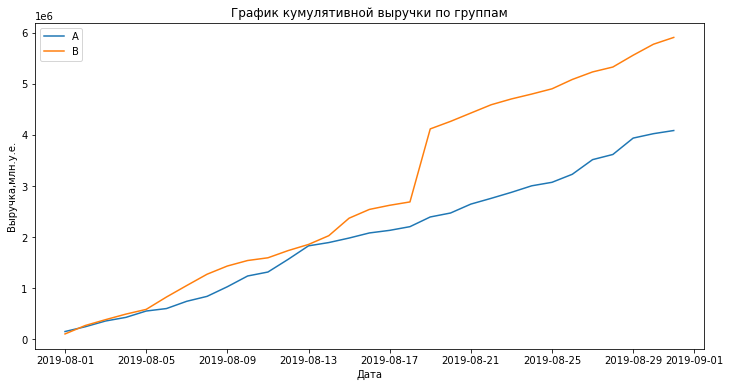

In [16]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and
        (orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'transactionId' : 'nunique', 
            'visitorId' : 'nunique', 
            'revenue' : 'sum'
        }
    ), axis=1
).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and
        (visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg(
        {'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'
        }
    ), axis=1
).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# изменим масштаб графика, чтобы даты не накладывались друг на друга
fig, ax = plt.subplots(figsize=(12, 6))

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка,млн.у.е.')
plt.legend();

<div class="alert alert-info">
<p> С 1 августа 2019 года наблюдался рост выручки по обеим группам. В период с 1 по 5 августа рост выручки в группе В незначительно опережал рост выручки в группе А. После 5 августа выручка в группе В увеличивалась быстрее, чем в группе А. Тем не менее, 13 августа группа А догнала группу В по объему выручки, после чего произошел резкий скачок кривой выручки группы В, после чего данная группа в значительной мере опередила группу А.
<p> Такой резкий скачок увеличения выручки может быть связан с крупной покупкой, которая не характерна для интернет-магазина. Еще одним возможным вариантом является всплекс количества заказов. Далее рассмотрим подробнее.

### Построение графика кумулятивного среднего чека по группам

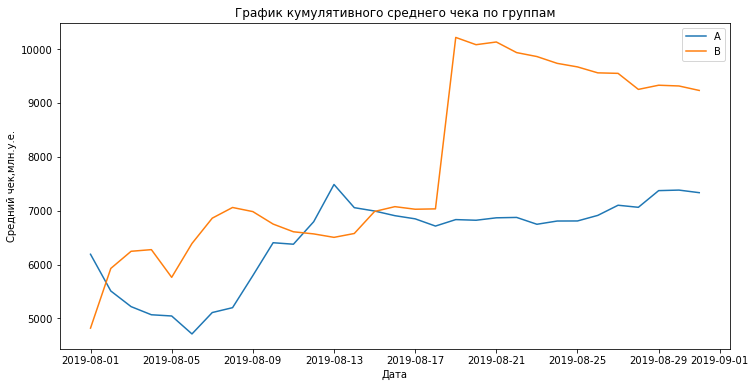

In [17]:
# изменим масштаб графика, чтобы даты не накладывались друг на друга
fig, ax = plt.subplots(figsize=(12, 6))

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек,млн.у.е.')
plt.legend();

<div class="alert alert-info">
<p> Средний чек группы В практически весь рассматриваемый период превышает средний чек группы А. Лишь с 12 по 15 августа группа А обогнала группу В по данному показателю. 18 августа в группе В наблюдался резкий скачок роста среднего чека, что подтверждает нашу гипотезу о появлении аномально крупных заказов. После данного всплеска средний чек группы В начал постепенно снижаться, в то время как средний чек группы А плавно рос. Стоит отметить резкое увеличение среднего чека и группа А, произошедшее 13 августа, после чего до 18 августа средний чек начал падать.    

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

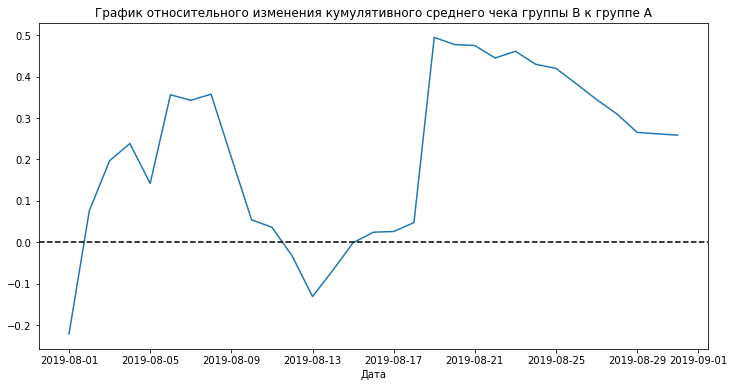

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

# изменим масштаб графика, чтобы даты не накладывались друг на друга
fig, ax = plt.subplots(figsize=(12, 6))

# cтроим отношение средних чеков
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

<div class="alert alert-info">
<p> Из графика можно сделать вывод, что в данных точно имеются крупные заказы и выбросы, так как в нескольких точках график различия между сегментами резко «скачет». Стоит также отметить, что большую часть рассматриваемого периода группа А значительно проигрывала группе В.

### Построение графика кумулятивного среднего количества заказов на посетителя по группам

In [19]:
print('min_date:', cumulativeData['date'].min())
print('max_date:', cumulativeData['date'].max())

min_date: 2019-08-01 00:00:00
max_date: 2019-08-31 00:00:00


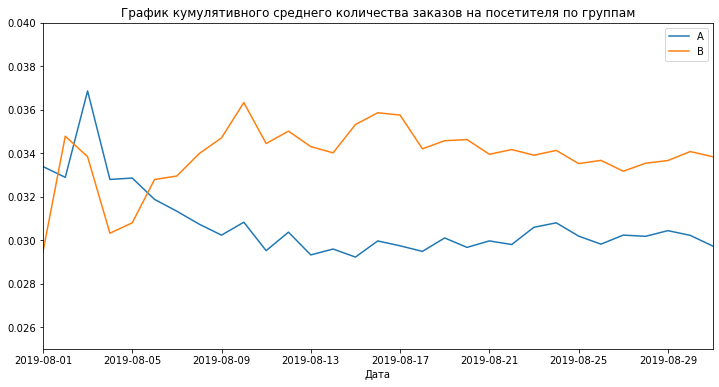

In [20]:
# считаем кумулятивное среднее количество заказов 
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# изменим масштаб графика, чтобы даты не накладывались друг на друга
fig, ax = plt.subplots(figsize=(12, 6))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.025, 0.04])

plt.xlabel('Дата')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам');

<div class="alert alert-info">
<p> В первые 5 дней прирост среднего количества заказов на посетителя был больше у группы А. Наибольшее значение данного показателя у группы А было 3 августа, после чего началось его падение. В группе В наблюдалось снижение среднего количества заказов на 4 день, за которым последовал рост. После 8 августа наблюдается некоторая стабилизация показатея по обеим группам.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

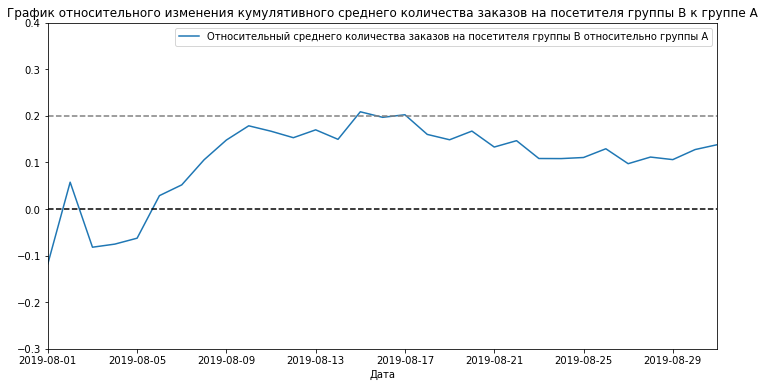

In [21]:
# подготовим данные
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

# изменим масштаб графика, чтобы даты не накладывались друг на друга
fig, ax = plt.subplots(figsize=(12, 6))

#построим график
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label = "Относительный среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.3, 0.4])

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата');

<div class="alert alert-info">
<p> До 5 августа по среднему количеству заказов на посетителя лидировала группа А, после этой даты группа В вырвалась вперед.

### Построение точечного графика количества заказов по пользователям

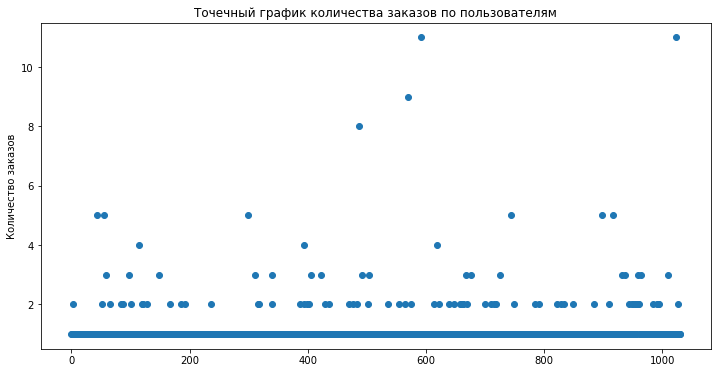

In [22]:
# сгруппируем данные для построения графика
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# изменим масштаб графика
fig, ax = plt.subplots(figsize=(12, 6))

# построим график
plt.scatter(x_values, ordersByUsers['orders']);

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов');

<div class="alert alert-info">
<p> Основная часть пользователей сделала только один заказ. Тех, кто совершил 2 покупки, крайне мало. Также наблюдаются выбросы, превышающие 3 заказа.

### Расчет 95-го и 99-го перцентилей количества заказов на пользователя

In [23]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

<div class="alert alert-info">
<p> Не более 5% пользователей оформляли больше чем 2 заказа. И только 1% пользователей заказывали более четырех раз. 
Выберем 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

### Построение точечного графика стоимостей заказов

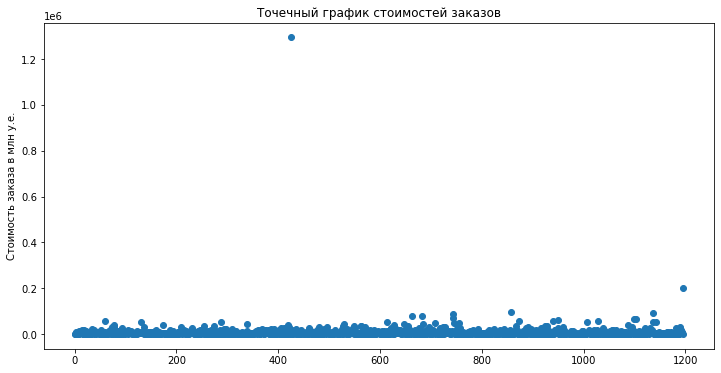

In [24]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders['revenue'])))

# изменим масштаб графика
fig, ax = plt.subplots(figsize=(12, 6))

# построим график
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн у.е.');

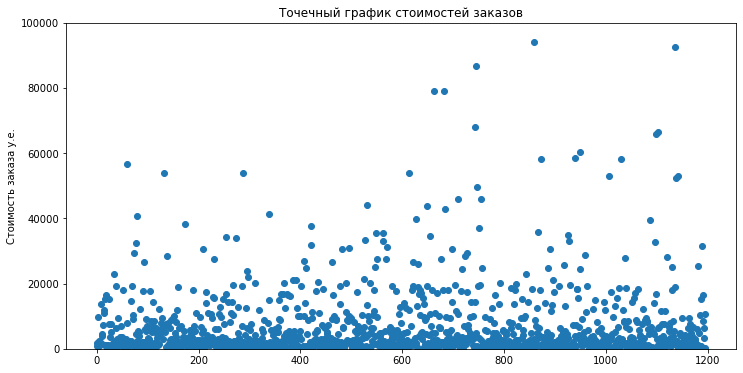

In [25]:
# посмотрим более детально на распределение стоимости заказов
# изменим масштаб графика
fig, ax = plt.subplots(figsize=(12, 6))

# задаем масштаб осей
plt.ylim([0, 100000])

# построим график
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа у.е.');

<div class="alert alert-info">
<p> Большая часть заказов распределена равномерно, в основном их стоимость не превышает 100 000 у.е. Большая часть заказов находится в диапазоне от 0 до 10 000 у.е. Также наблюдаются выбросы: заказ на сумму боле 1,2 млн у.е. и на сумму 200 тыс. у.е.

### Расчет 95-го и 99-го перцентилей стоимости заказов

In [26]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

<div class="alert alert-info">
<p> Не более 5% пользователей оформляют покупки на сумму 28 тыс.у.е., а только 1% пользователей заказывали на сумму более чем 58,2 тыс.у.е. Примем за границу для удаления аномальных заказов 28 тыс.у.е.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы: 
* **нулевая**: различий в среднем количестве заказов между группами нет; 
* **альтернативная:** различия в среднем между группами есть.
<p>Для проверки гипотезы будем сипользовать непараметрический тест Уилкоксона-Манна-Уитни, а значение критического уровня статистической значимости примем за alpha = 0.05.

In [27]:
# подготовим данные для расчета

# кол-во покупателей по дням для группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# кол-во покупателей по дням для группы А с накоплением
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# кол-во покупателей по дням для группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# кол-во покупателей по дням для группы В с накоплением
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# кол-во заказов по дням для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# кол-во заказов по дням для группы А с накоплением
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# кол-во заказов по дням для группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# кол-во заказов по дням для группы А с накоплением
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# объединим полученные данные
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# кол-во заказов для пользователей группы А, совершивших хотя бы 1 заказ

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

# кол-во заказов для пользователей группы В, совершивших хотя бы 1 заказ
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

# для пользователей с заказами - число заказов пользователя, а для пользователей без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# расчет статистической значимости
print("p-value:", "{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительные различия в среднем чеке между группами:', "{0:.4f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.0168
Относительные различия в среднем чеке между группами: 0.1381


<div class="alert alert-info">
<p> p-value = 0.0168 меньше 0.05, исходя из чего нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами нет, отвергаем. Относительный прирост среднего количества заказов на посетителя группы В к среднему количеству заказов группы А равен 13,81%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы: 
* **нулевая**: различий в среднем количестве заказов между группами нет; 
* **альтернативная:** различия в среднем между группами есть.

In [28]:
# расчет статистической значимости
print("p-value:", '{0:.4f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия в среднем чеке между группами:', '{0:.4f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1)) 

p-value: 0.7293
Относительные различия в среднем чеке между группами: 0.2587


<div class="alert alert-info">
<p> Исходя из значения p-value, можно говорить об отсутствии статистически значимых отличий в среднем чеке между группами, то есть средний чек группы B равен среднему чеку группы A. Наблюдаемое различие не значимо, получено случайно из-за единичных выбросов.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сформулируем гипотезы: 
* **нулевая**: различий в среднем количестве заказов «очищенным» данным между группами нет; 
* **альтернативная:** различия в среднем между группами есть.

In [29]:
# посмотрим, сколько у нас аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[0]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[0]]['visitorId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[0]]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


In [30]:
# отфильтруем данные

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [31]:
# применим статистический критерий Манна-Уитни к полученным выборкам
print("p-value:", '{0:.4f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия в среднем чеке между группами:', '{0:.4f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.0130
Относительные различия в среднем чеке между группами: 0.1727


<div class="alert alert-info">
<p> Как и в случае с сырыми данными, нулевую гипотезу отвергаем. А вот результаты по относительному различию изменились: группа В оказалась лучше по среднему количеству заказов на посетителя на 17,3%, до "очистки" данных - 13,81%

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы: 
* **нулевая**: различий в среднем чеке «очищенным» данным между группами нет; 
* **альтернативная:** различия в среднем между группами есть.

In [32]:
print("p-value:", 
    '{0:.4f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия в среднем чеке между группами:',
    "{0:.4f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.7385
Относительные различия в среднем чеке между группами: -0.0196


<div class="alert alert-info">
<p> P-value, рассчитанный по очищенным данным, изменился незначительно и нулевую гипотезу отвергнуть мы не можем. Как и предполагалось ранее, резкий всплеск увеличения среднего чека в группе В связан с аномальными заказами, после удаления которых средний чек у сегмента В снизился настолько, что сегмент А стал превосходить В на 2%.

### Выводы 


<div class="alert alert-info">
<p> По итогам теста статистически значимых различий в среднем количестве заказов на посетителя ни по сырым, ни по очищенным данным не было выявлено, а пользователи из группы В, как правило, совершают больше заказов, чем люди из группы А.
<p> А вот при расчете статистической значимости различий в среднем чеке между группами по «очищенным» данным и «сырым» данным наблюдаются изменения. Средний чек группы В превышал данный показатель для группы А, но после удаления выборсов, он стал меньше. Тем не менее, гипотеза об отсутствии статистически значимых различий между средними чеками групп А и В подтверждаем.
<p> Среднее количество заказов на покупателя значительно выше у группы В, в то время как средний чек между группами различается незначительно. Поэтому было принято решение остановить тест и признать победу за группой В.

# Выводы

<div class="alert alert-info">
<p> Данный проект концептуально был поделен на 2 части. В первом приоритезировались гипотезы с помощью фреймворков ICE и RICE. В результате были выбраны три наиболее перспективные гипотезы:
<p> Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
<p> Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
<p> Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию/
<p> На втором этапе был проведен анализ A/B-теста. На шаге знакомства с данными были выявлены некоторые проблемы, а именно неравномерность в распределении пользователей по группам. Тем не менее, было принято решение работать с имеющимися данными без изменений. Были изучены такие показатели, как средний чек и среднее количество заказов на пользователя. В результате тест был остановлен и признана победа группы В.